### NẠP THƯ VIỆN

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### ĐỌC FILE DỮ LIỆU BAN ĐẦU

### Tải dữ liệu

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data (1).csv


### Đọc file csv

In [ ]:
df = pd.read_csv('Data.csv')


### Xem 5 dòng đầu của dữ liệu ban đầu

In [ ]:
df.head()

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Country,Afghanistan,1850,AFG,3752993.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.436,0.629,NaN,NaN
1,Country,Afghanistan,1851,AFG,3767956.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,7.500,0.633,NaN,NaN
2,Country,Afghanistan,1852,AFG,3783940.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.560,0.637,NaN,NaN
3,Country,Afghanistan,1853,AFG,3800954.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.620,0.641,NaN,NaN
4,Country,Afghanistan,1854,AFG,3818038.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.678,0.644,NaN,NaN


### Mô tả dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43746 entries, 0 to 43745
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Description                                43746 non-null  object 
 1   Name                                       43746 non-null  object 
 2   year                                       43746 non-null  int64  
 3   iso_code                                   37921 non-null  object 
 4   population                                 37965 non-null  float64
 5   gdp                                        14989 non-null  float64
 6   cement_co2                                 23612 non-null  float64
 7   cement_co2_per_capita                      22715 non-null  float64
 8   co2                                        27059 non-null  float64
 9   co2_growth_abs                             24987 non-null  float64
 10  co2_growth_prct       

Kiểm tra missing_values

In [ ]:
missing_df = pd.DataFrame({
    'Missing_Values': df.isnull().sum(),
    'Missing_Percent': (df.isnull().sum() / len(df)) * 100
})
print("Bảng thống kê giá trị bị thiếu:")
print(missing_df)

Bảng thống kê giá trị bị thiếu:
                             Missing_Values  Missing_Percent
Description                               0         0.000000
Name                                      0         0.000000
year                                      0         0.000000
iso_code                               5825        13.315503
population                             5781        13.214923
...                                     ...              ...
temperature_change_from_n2o            5686        12.997760
total_ghg                              6336        14.483610
total_ghg_excluding_lucf               6510        14.881361
trade_co2                             39211        89.633338
trade_co2_share                       39211        89.633338

[80 rows x 2 columns]


### NẠP FILE DỮ LIỆU ĐÃ XỬ LÝ BẰNG EXCEL

### Tải dữ liệu

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DataCO2.xlsx to DataCO2.xlsx


### Đọc file excel

In [4]:
df = pd.read_excel('DataCO2.xlsx')

### Mô tả dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Description                  6072 non-null   object 
 1   Name                         6072 non-null   object 
 2   year                         6072 non-null   int64  
 3   population                   5520 non-null   float64
 4   gdp                          3782 non-null   float64
 5   co2                          5904 non-null   float64
 6   co2_per_capita               5544 non-null   float64
 7   co2_per_gdp                  4150 non-null   float64
 8   co2_growth_abs               5640 non-null   float64
 9   co2_growth_prct              5596 non-null   float64
 10  cement_co2                   5438 non-null   float64
 11  coal_co2                     3752 non-null   float64
 12  flaring_co2                  5664 non-null   float64
 13  gas_co2           

### TIỀN XỬ LÝ DỮ LIỆU

### Loại bỏ các dòng trùng lặp

In [5]:
df = df.drop_duplicates()

### Chuẩn hóa và chuyển các cột định lượng sang dạng numeric


In [6]:
numeric_cols = [
 'population',	'gdp',	'co2',	'co2_per_capita',	'co2_per_gdp',	'co2_growth_abs',	'co2_growth_prct',	'cement_co2',	'coal_co2',	'flaring_co2',	'gas_co2',	'land_use_change_co2',	'oil_co2',	'primary_energy_consumption',	'temperature_change_from_co2'
 ]

for c in numeric_cols + ['year']:
    if c in df.columns:
        df[c] = (
            df[c].astype(str)                          # Ép mọi giá trị thành chuỗi
                 .str.replace(",", "", regex=False)    # Loại bỏ dấu phẩy ("1,000" → "1000")
                 .str.replace(" ", "", regex=False)    # Loại bỏ khoảng trắng (" 1000 " → "1000")
                 .replace({"": np.nan, "nan": np.nan, "NA": np.nan, "N/A": np.nan})  # Chuẩn hóa giá trị rỗng về NaN
        )
        df[c] = pd.to_numeric(df[c], errors="coerce")  # Chuyển thành số


### Chuẩn hóa và chuyển cột Name sang dạng sang dạng string

In [7]:
df['Name'] = df['Name'].astype(str).str.strip()

In [ ]:
df.head()

,Description,Name,year,population,gdp,co2,co2_per_capita,co2_per_gdp,co2_growth_abs,co2_growth_prct,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,primary_energy_consumption,temperature_change_from_co2
0,Country,Afghanistan,2000,20130334.0,1.128379e+10,1.047,0.052,0.093,-0.045,-4.078,0.010,0.004,0.022,0.224,0.057,0.788,5.914,0.000
1,Country,Albania,2000,3166147.0,1.473684e+10,3.025,0.053,0.097,0.039,1.297,0.094,0.070,0.000,0.022,-0.087,2.840,28.732,0.000
2,Country,Algeria,2000,30903895.0,2.085540e+11,85.399,0.063,0.071,-6.051,-6.616,3.789,1.960,14.287,38.534,5.087,26.828,299.946,0.001
3,Country,Andorra,2000,65703.0,NaN,0.524,0.069,0.074,0.011,2.143,0.000,0.000,0.000,NaN,0.029,0.524,NaN,0.000
4,Country,Angola,2000,16194872.0,2.351218e+10,15.995,0.053,0.055,-1.266,-7.335,0.081,NaN,11.162,1.085,23.296,3.668,32.448,0.002


### PHÂN TÍCH MÔ TẢ

### Thống kê cơ bản

In [ ]:
# Chỉ lấy các cột số học (numeric)
df_numeric = df[numeric_cols].copy()

# Tạo bảng thống kê cơ bản
thong_ke = pd.DataFrame({
    'Count': df_numeric.count(),
    'Mean': df_numeric.mean(),
    'Median': df_numeric.median(),
    'Std': df_numeric.std(),
    'Min': df_numeric.min(),
    'Max': df_numeric.max()
}).round(3)  # làm gọn số thập phân

# Hiển thị bảng kết quả
print("BẢNG THỐNG KÊ MÔ TẢ CÁC BIẾN SỐ:")
print(thong_ke)


BẢNG THỐNG KÊ MÔ TẢ CÁC BIẾN SỐ:
                             Count          Mean        Median           Std  \
population                    5520  1.333204e+08  6.938620e+06  6.311931e+08   
gdp                           3782  8.602864e+11  7.626427e+10  6.012951e+12   
co2                           5904  8.654170e+02  1.194000e+01  3.361826e+03   
co2_per_capita                5544  5.106000e+00  3.170000e+00  6.339000e+00   
co2_per_gdp                   4150  2.870000e-01  2.370000e-01  2.110000e-01   
co2_growth_abs                5640  9.236000e+00  2.600000e-02  9.778900e+01   
co2_growth_prct               5596  3.425000e+00  1.619000e+00  5.910200e+01   
cement_co2                    5438  2.493700e+01  4.960000e-01  1.328820e+02   
coal_co2                      3752  3.739690e+02  3.982000e+00  1.576702e+03   
flaring_co2                   5664  7.403000e+00  0.000000e+00  3.138800e+01   
gas_co2                       3463  2.174860e+02  1.154100e+01  7.392490e+02   
land_us

### Phân phối các biến bằng Histogram

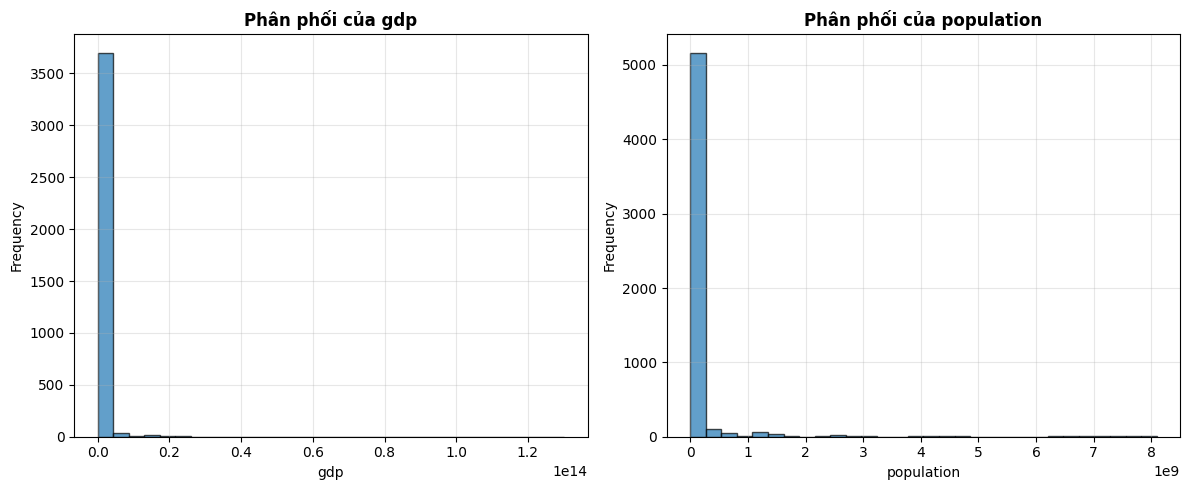

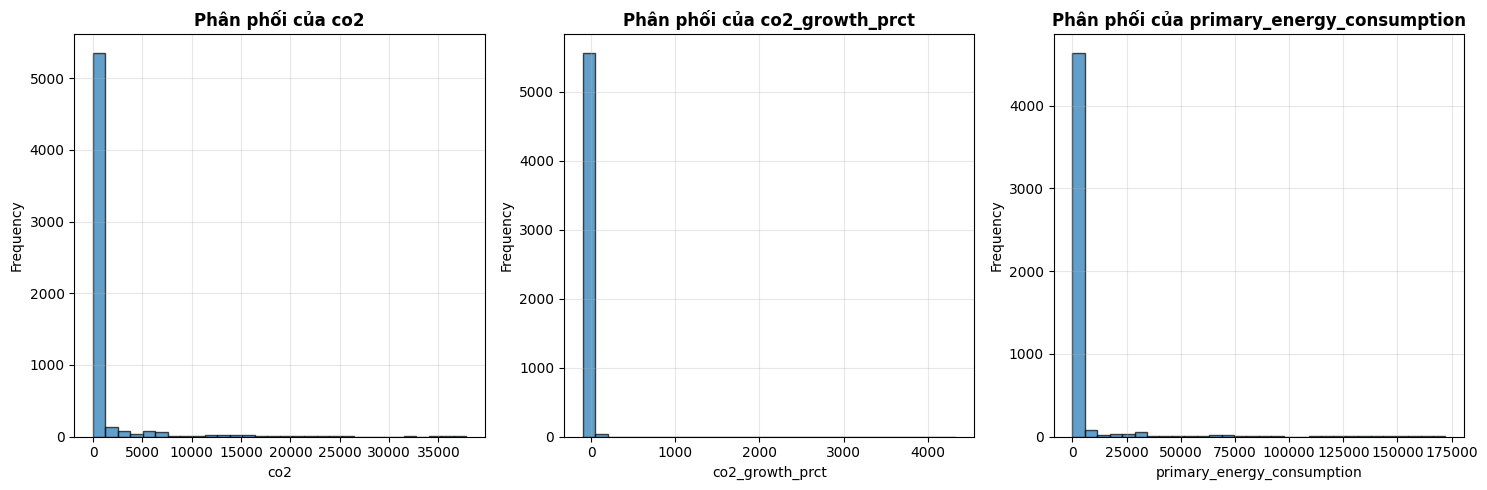

In [ ]:
# Vẽ biểu đồ
cols_1 = ['gdp', 'population']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 hàng, 2 cột
for i, col in enumerate(cols_1):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    axes[i].set_title(f"Phân phối của {col}", fontsize=12, weight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)
plt.tight_layout()
plt.show()

cols_2 = ['co2', 'co2_growth_prct', 'primary_energy_consumption']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 hàng, 3 cột
for i, col in enumerate(cols_2):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    axes[i].set_title(f"Phân phối của {col}", fontsize=12, weight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Top 5 quốc gia phát thải CO2 cao nhất năm 2023

In [23]:
# nạp thư viện
import plotly.express as px

# Chọn năm 2023 để phân tích
NAM_PHAN_TICH = 2023

# Lọc dữ liệu năm 2023 và chỉ lấy các quốc gia
df_2023_country = df[
    (df["year"] == NAM_PHAN_TICH) &
    (df["Description"] == "Country")
].dropna(subset=["co2"])

# Top 5 quốc gia phát thải CO₂ cao nhất
top_5_max = df_2023_country.nlargest(5, "co2")

# Vẽ biểu đồ: Top 5 quốc gia phát thải CO₂ cao nhất
fig_max = px.bar(
    top_5_max,
    x="Name",
    y="co2",
    color="co2",
    color_continuous_scale=px.colors.sequential.Reds,
    title=f"Top 5 quốc gia phát thải CO₂ cao nhất năm {NAM_PHAN_TICH}",
    text=top_5_max["co2"].apply(lambda x: f"{x:,.0f}")
)
fig_max.update_traces(textposition="outside")
fig_max.update_layout(
    xaxis_title="Quốc gia",
    yaxis_title="Phát thải CO₂ (triệu tấn)"
)
fig_max.show()

### Top 5 quốc gia phát thải CO2 thấp nhất năm 2023

In [24]:
# Top 5 quốc gia phát thải CO₂ thấp nhất (loại bỏ giá trị 0)
top_5_min = df_2023_country[df_2023_country["co2"] > 0].nsmallest(5, "co2")

# Vẽ biểu đồ: Top 5 quốc gia phát thải CO₂ thấp nhất
fig_min = px.bar(
    top_5_min,
    x="Name",
    y="co2",
    color="co2",
    color_continuous_scale=px.colors.sequential.Blues,
    title=f"Top 5 quốc gia phát thải CO₂ thấp nhất năm {NAM_PHAN_TICH}",
    text=top_5_min["co2"].apply(lambda x: f"{x:,.3f}")
)
fig_min.update_traces(textposition="outside")
fig_min.update_layout(
    xaxis_title="Quốc gia",
    yaxis_title="Phát thải CO₂ (triệu tấn)"
)
fig_min.show()

### Mức phát thải CO2 trung bình theo nguồn giai đoạn 2000-2023

CẤU TRÚC PHÁT THẢI CO₂ THEO NGUỒN GIAI ĐOẠN 2000-2023
                     Phát thải trung bình (triệu tấn)  Tỷ trọng (%)
coal_co2                                      373.969         39.41
gas_co2                                       217.486         22.92
oil_co2                                       217.151         22.88
land_use_change_co2                           108.023         11.38
cement_co2                                     24.937          2.63
flaring_co2                                     7.403          0.78


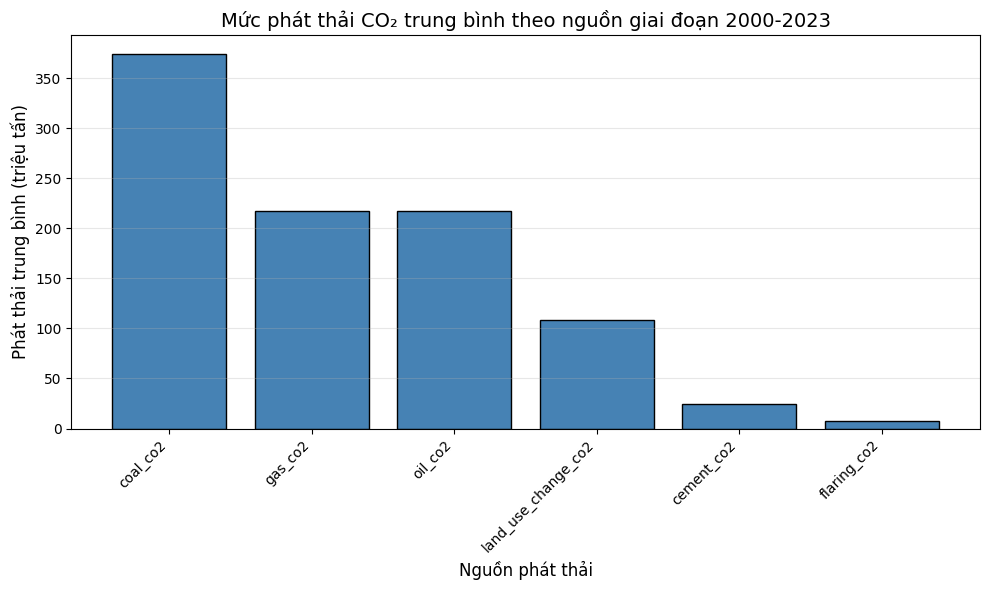

In [ ]:
# Các cột phát thải theo nguồn
emission_sources = [
    'cement_co2', 'coal_co2', 'flaring_co2',
    'gas_co2', 'land_use_change_co2', 'oil_co2'
]

# Lọc dữ liệu chỉ gồm các cột nguồn phát thải
df_emissions = df[emission_sources].copy()

# Tính trung bình từng nguồn
emission_means = df_emissions.mean()

# Tính tỷ trọng (%) từng nguồn trong tổng trung bình
emission_share = (emission_means / emission_means.sum()) * 100

# Tạo bảng tóm tắt
emission_summary = pd.DataFrame({
    'Phát thải trung bình (triệu tấn)': emission_means.round(3),
    'Tỷ trọng (%)': emission_share.round(2)
}).sort_values('Phát thải trung bình (triệu tấn)', ascending=False)

# In bảng kết quả
print("CẤU TRÚC PHÁT THẢI CO₂ THEO NGUỒN GIAI ĐOẠN 2000-2023")
print(emission_summary)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(emission_summary.index,
        emission_summary['Phát thải trung bình (triệu tấn)'],
        color='steelblue', edgecolor='black')

plt.title('Mức phát thải CO₂ trung bình theo nguồn giai đoạn 2000-2023', fontsize=14)
plt.xlabel('Nguồn phát thải', fontsize=12)
plt.ylabel('Phát thải trung bình (triệu tấn)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Xu hướng phát thải CO2 toàn cầu giai đoạn 2000-2023

In [25]:
# 1. Tính tổng phát thải CO2 toàn cầu qua các năm cho từng quốc gia
co2_trend_raw = df[df['Description'] == 'Country'].groupby('year')['co2'].sum().reset_index()
co2_trend_raw.columns = ['Year', 'Total CO2 Emission']

# 2. Biểu đồ đường (Line Plot) dùng Plotly (tương tác)
fig_3 = px.line(co2_trend_raw,
                x='Year',
                y='Total CO2 Emission',
                title='Xu hướng Phát thải CO₂ Toàn cầu giai đoạn 2000-2023',
                markers=True) # Thêm dấu chấm tại mỗi năm
fig_3.update_layout(xaxis_title='Năm',
                    yaxis_title='Tổng Phát thải CO₂ (triệu tấn)')
fig_3.show()

### Phân tích tương quan

In [26]:
# Tính ma trận tương quan
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Hiển thị ma trận tương quan dạng số
print("Ma trận tương quan giữa các biến")
print(correlation_matrix.round(3))

Ma trận tương quan giữa các biến
                              year  population    gdp    co2  co2_per_capita  \
year                         1.000       0.017  0.065  0.026           0.166   
population                   0.017       1.000  0.962  0.920           0.012   
gdp                          0.065       0.962  1.000  0.984           0.012   
co2                          0.026       0.920  0.984  1.000           0.012   
co2_per_capita               0.166       0.012  0.012  0.012           1.000   
co2_per_gdp                  0.125      -0.040 -0.007 -0.058           0.472   
co2_growth_abs              -0.039       0.566  0.334  0.499          -0.002   
co2_growth_prct             -0.025      -0.003 -0.019 -0.007           0.006   
cement_co2                   0.039       0.923  0.917  0.928           0.010   
coal_co2                     0.026       0.916  0.920  0.966           0.006   
flaring_co2                  0.018       0.882  0.941  0.937           0.016   
gas_co2

### Ma trận tương quan tổng thể

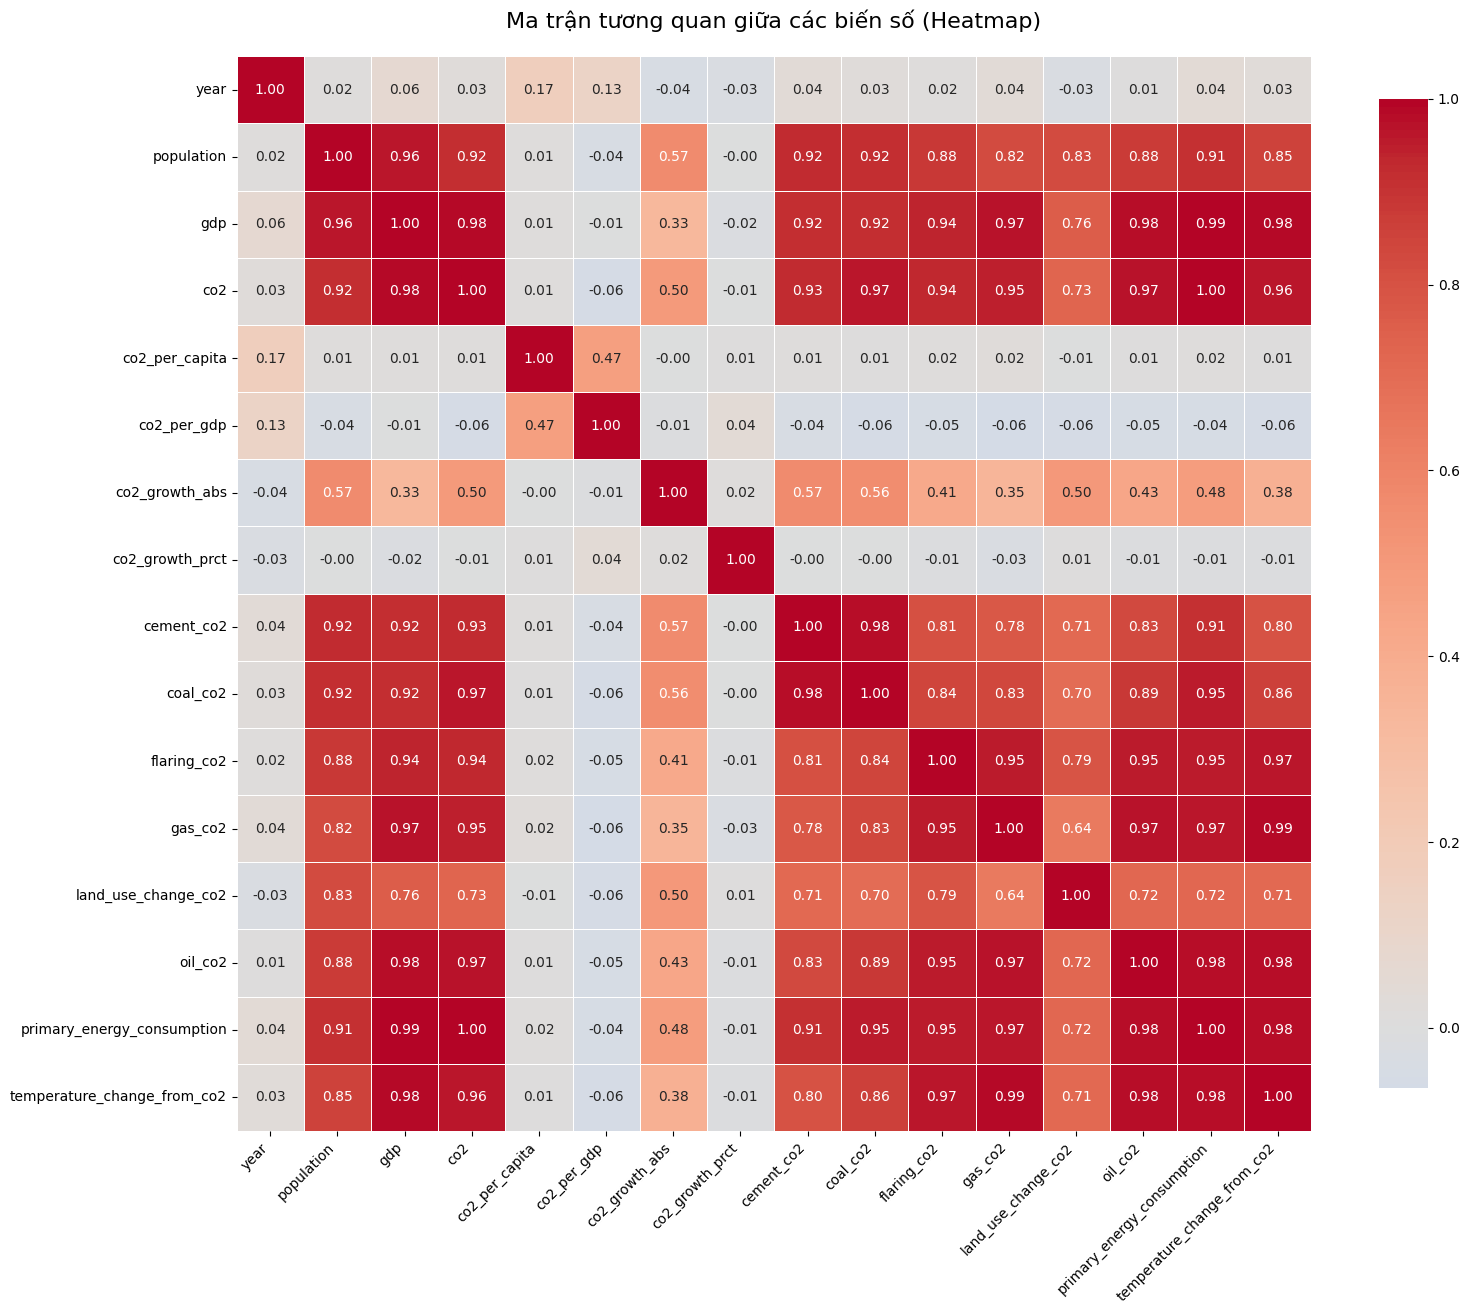

In [27]:
# Vẽ heatmap tương quan đầy đủ
plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,           # Hiển thị giá trị tương quan
    fmt='.2f',            # Format 2 chữ số thập phân
    cmap='coolwarm',      # Bảng màu: xanh (âm) → trắng (0) → đỏ (dương)
    center=0,             # Căn giữa tại 0
    square=True,          # Ô vuông
    linewidths=0.5,       # Đường kẻ giữa các ô
    cbar_kws={"shrink": 0.8}
)
plt.title('Ma trận tương quan giữa các biến số (Heatmap)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Lọc các cặp biến có tương quan mạnh (|r| > 0.7) ngoài đường chéo
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]

        if abs(corr_value) > 0.7:  # Ngưỡng tương quan mạnh
            strong_corr.append({
                'Biến 1': var1,
                'Biến 2': var2,
                'Hệ số tương quan': round(corr_value, 3),
                'Loại': 'Dương' if corr_value > 0 else 'Âm'
            })

# Sắp xếp theo độ lớn của tương quan
strong_corr_df = pd.DataFrame(strong_corr).sort_values(
    by='Hệ số tương quan',
    key=abs,
    ascending=False
)

print("Các cặp biến có tương quan mạnh (|r| > 0.7)")
display(strong_corr_df)


Các cặp biến có tương quan mạnh (|r| > 0.7)


,Biến 1,Biến 2,Hệ số tương quan,Loại
25,co2,primary_energy_consumption,0.997,Dương
17,gdp,primary_energy_consumption,0.992,Dương
46,gas_co2,temperature_change_from_co2,0.986,Dương
10,gdp,co2,0.984,Dương
18,gdp,temperature_change_from_co2,0.984,Dương
51,oil_co2,temperature_change_from_co2,0.983,Dương
50,oil_co2,primary_energy_consumption,0.983,Dương
16,gdp,oil_co2,0.982,Dương
27,cement_co2,coal_co2,0.982,Dương
52,primary_energy_consumption,temperature_change_from_co2,0.976,Dương


### Tương quan giữa gdp và co2

In [ ]:
df_country = df[df['Description'] == 'Country']

# Lọc dữ liệu hợp lệ cho phân tích GDP - CO2
df_gdp_co2 = df_country[['Name', 'year', 'gdp', 'co2']].dropna()

print(f"Số quan sát hợp lệ: {len(df_gdp_co2):,}")
print(f"Tương quan GDP - CO2: {df_gdp_co2['gdp'].corr(df_gdp_co2['co2']):.4f}")

# Scatter plot với log scale để nhìn rõ hơn
fig = px.scatter(
    df_gdp_co2,
    x='gdp',
    y='co2',
    color='year',
    hover_data=['Name', 'year'],
    title='Mối quan hệ GDP - CO₂ (thang logarit)',
    labels={
        'gdp': 'GDP (USD) - log scale',
        'co2': 'Phát thải CO₂ (triệu tấn) - log scale',
        'year': 'Năm'
    },
    color_continuous_scale='Viridis',
    opacity=0.6,
    log_x=True,
    log_y=True
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(height=600)
fig.show()

Số quan sát hợp lệ: 3,749
Tương quan GDP - CO2: 0.9479


### Hồi quy tuyến tính gdp và co2

=== Mô hình hồi quy tuyến tính: CO2 = β₀ + β₁ × GDP ===
Hệ số chặn (β₀): -38.4702
Hệ số góc (β₁): 0.000000
R² (độ giải thích): 0.8985

→ Khi GDP tăng 1 tỷ USD, CO₂ tăng 0.41 triệu tấn


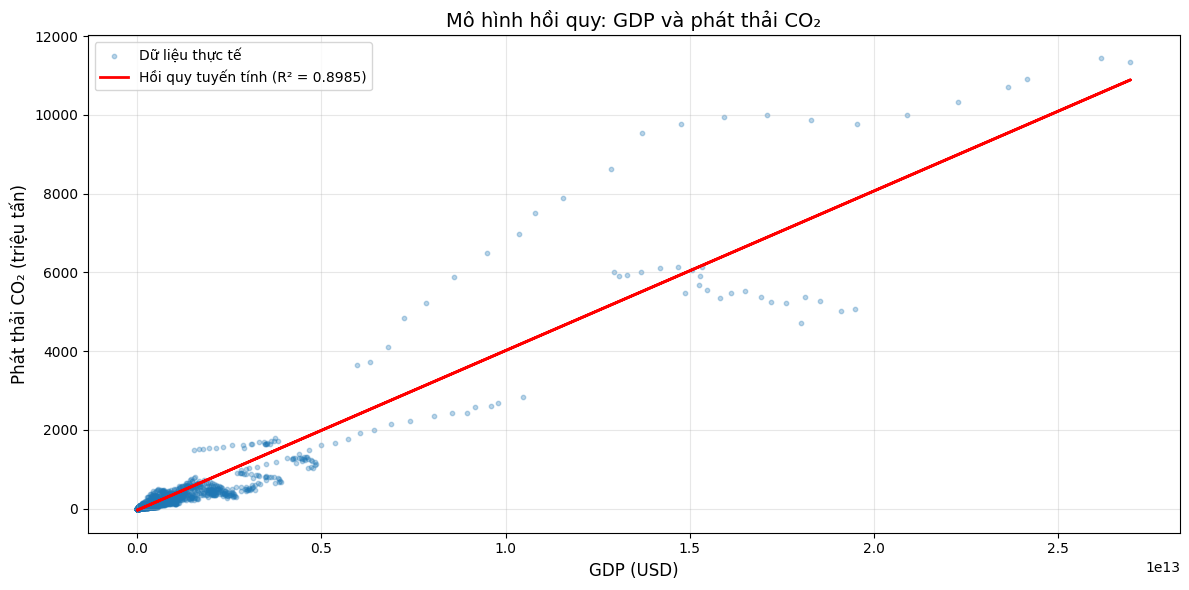

In [ ]:
# Nạp thư viện
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_gdp_co2[['gdp']].values
y = df_gdp_co2['co2'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print(f"=== Mô hình hồi quy tuyến tính: CO2 = β₀ + β₁ × GDP ===")
print(f"Hệ số chặn (β₀): {model.intercept_:.4f}")
print(f"Hệ số góc (β₁): {model.coef_[0]:.6f}")
print(f"R² (độ giải thích): {r2:.4f}")
print(f"\n→ Khi GDP tăng 1 tỷ USD, CO₂ tăng {model.coef_[0]*1e9:.2f} triệu tấn")

# Vẽ đường hồi quy
plt.figure(figsize=(12, 6))
plt.scatter(X, y, alpha=0.3, s=10, label='Dữ liệu thực tế')
plt.plot(X, y_pred, color='red', linewidth=2, label=f'Hồi quy tuyến tính (R² = {r2:.4f})')
plt.xlabel('GDP (USD)', fontsize=12)
plt.ylabel('Phát thải CO₂ (triệu tấn)', fontsize=12)
plt.title('Mô hình hồi quy: GDP và phát thải CO₂', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Tương quan giữa population và co2

In [ ]:
# Lọc dữ liệu hợp lệ
df_pop_co2 = df_country[['Name', 'year', 'population', 'co2']].dropna()

print(f"Số quan sát hợp lệ: {len(df_pop_co2):,}")
print(f"Tương quan Dân số - CO2: {df_pop_co2['population'].corr(df_pop_co2['co2']):.4f}")

# Scatter plot với log scale
fig = px.scatter(
    df_pop_co2,
    x='population',
    y='co2',
    color='year',
    hover_data=['Name', 'year'],
    title='Mối quan hệ Dân số - CO₂ (thang logarit)',
    labels={
        'population': 'Dân số - log scale',
        'co2': 'Phát thải CO₂ (triệu tấn) - log scale',
        'year': 'Năm'
    },
    color_continuous_scale='Plasma',
    opacity=0.6,
    log_x=True,
    log_y=True
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(height=600)
fig.show()

Số quan sát hợp lệ: 4,680
Tương quan Dân số - CO2: 0.7648


### Hồi quy tuyến tính population và co2

=== Mô hình hồi quy tuyến tính: CO2 = β₀ + β₁ × Dân số ===
Hệ số chặn (β₀): 6.9374
Hệ số góc (β₁): 0.000004
R² (độ giải thích): 0.5849

→ Khi dân số tăng 1 triệu người, CO₂ tăng 0.0000 triệu tấn


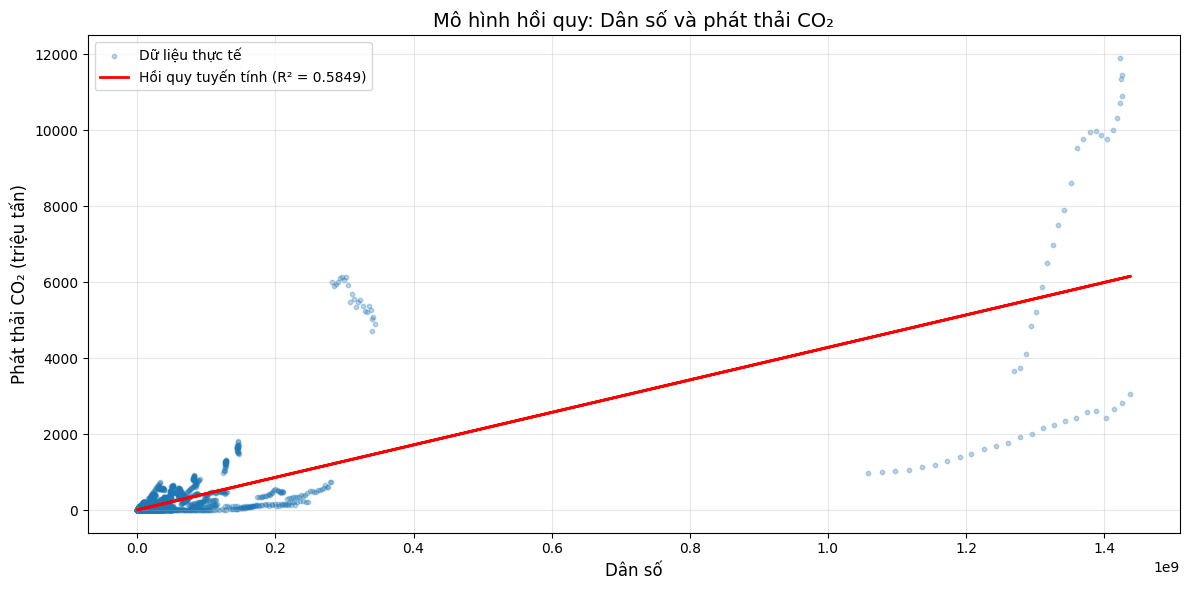

In [ ]:
# Lọc dữ liệu hợp lệ
df_pop_co2 = df_country[['Name', 'year', 'population', 'co2']].dropna()

X_pop = df_pop_co2[['population']].values
y_pop = df_pop_co2['co2'].values

model_pop = LinearRegression()
model_pop.fit(X_pop, y_pop)
y_pop_pred = model_pop.predict(X_pop)

r2_pop = r2_score(y_pop, y_pop_pred)

print(f"=== Mô hình hồi quy tuyến tính: CO2 = β₀ + β₁ × Dân số ===")
print(f"Hệ số chặn (β₀): {model_pop.intercept_:.4f}")
print(f"Hệ số góc (β₁): {model_pop.coef_[0]:.6f}")
print(f"R² (độ giải thích): {r2_pop:.4f}")
print(f"\n→ Khi dân số tăng 1 triệu người, CO₂ tăng {model_pop.coef_[0]:.4f} triệu tấn")
# Vẽ đường hồi quy
plt.figure(figsize=(12, 6))
plt.scatter(X_pop, y_pop, alpha=0.3, s=10, label='Dữ liệu thực tế')
plt.plot(X_pop, y_pop_pred, color='red', linewidth=2, label=f'Hồi quy tuyến tính (R² = {r2_pop:.4f})')
plt.xlabel('Dân số', fontsize=12)
plt.ylabel('Phát thải CO₂ (triệu tấn)', fontsize=12)
plt.title('Mô hình hồi quy: Dân số và phát thải CO₂', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Tương quan temperature_change_from_co2 và co2

In [ ]:
# Lọc dữ liệu hợp lệ cho phân tích Temperature - CO2
df_temp_co2 = df_country[['Name', 'year', 'temperature_change_from_co2', 'co2']].dropna()

print(f"Số quan sát hợp lệ: {len(df_temp_co2):,}")
print(f"Tương quan Temperature Change - CO2: {df_temp_co2['temperature_change_from_co2'].corr(df_temp_co2['co2']):.4f}")

Số quan sát hợp lệ: 4,680
Tương quan Temperature Change - CO2: 0.8057


In [ ]:
# Scatter plot với thang logarit
fig = px.scatter(
    df_temp_co2,
    x='temperature_change_from_co2',
    y='co2',
    color='year',
    hover_data=['Name', 'year'],
    title='Mối quan hệ giữa phát thải CO₂ và thay đổi nhiệt độ (thang logarit)',
    labels={
        'co2': 'Phát thải CO₂ (triệu tấn) - log scale',
        'temperature_change_from_co2': 'Thay đổi nhiệt độ từ CO₂ (°C) - log scale',
        'year': 'Năm'
    },
    color_continuous_scale='RdYlBu_r',  # Red-Yellow-Blue reversed (đỏ = nóng)
    opacity=0.6,
    log_x=True,
    log_y=True
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(
    height=600,
    xaxis_title="Thay đổi nhiệt độ từ CO₂ (°C) - log scale",
    yaxis_title="Phát thải CO₂ (triệu tấn) - log scale"
)
fig.show()


### Hồi quy tuyến tính temperature_change_from_co2 và co2


=== Mô hình hồi quy tuyến tính: Temperature Change = β₀ + β₁ × CO₂ ===
Hệ số chặn (β₀): 0.001710
Hệ số góc (β₁): 0.00001948
R² (độ giải thích): 0.6492

→ Khi CO₂ tăng 1 triệu tấn, nhiệt độ tăng 19.476522 °C
→ Hay khi CO₂ tăng 1.000 triệu tấn (1 GtCO₂), nhiệt độ tăng 19476.522205 °C


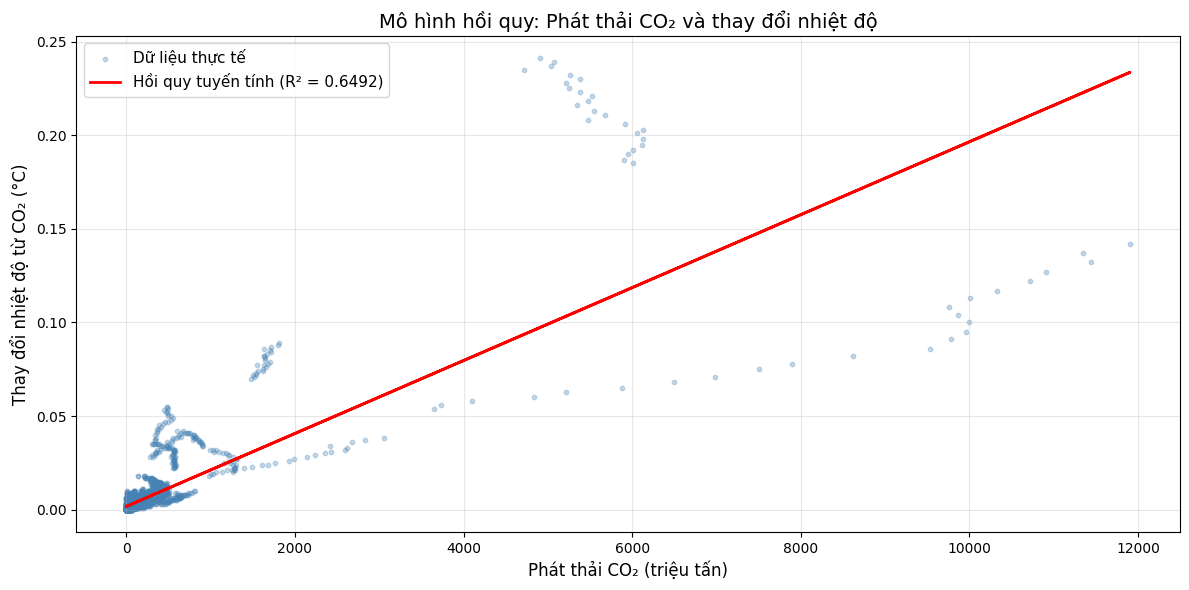

In [ ]:
# Nạp thư viện
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_temp = df_temp_co2[['co2']].values
y_temp = df_temp_co2['temperature_change_from_co2'].values

model_temp = LinearRegression()
model_temp.fit(X_temp, y_temp)
y_temp_pred = model_temp.predict(X_temp)

r2_temp = r2_score(y_temp, y_temp_pred)

print(f"\n=== Mô hình hồi quy tuyến tính: Temperature Change = β₀ + β₁ × CO₂ ===")
print(f"Hệ số chặn (β₀): {model_temp.intercept_:.6f}")
print(f"Hệ số góc (β₁): {model_temp.coef_[0]:.8f}")
print(f"R² (độ giải thích): {r2_temp:.4f}")
print(f"\n→ Khi CO₂ tăng 1 triệu tấn, nhiệt độ tăng {model_temp.coef_[0]*1e6:.6f} °C")
print(f"→ Hay khi CO₂ tăng 1.000 triệu tấn (1 GtCO₂), nhiệt độ tăng {model_temp.coef_[0]*1e9:.6f} °C")

# Vẽ đường hồi quy
plt.figure(figsize=(12, 6))
plt.scatter(X_temp, y_temp, alpha=0.3, s=10, label='Dữ liệu thực tế', c='steelblue')
plt.plot(X_temp, y_temp_pred, color='red', linewidth=2, label=f'Hồi quy tuyến tính (R² = {r2_temp:.4f})')
plt.xlabel('Phát thải CO₂ (triệu tấn)', fontsize=12)
plt.ylabel('Thay đổi nhiệt độ từ CO₂ (°C)', fontsize=12)
plt.title('Mô hình hồi quy: Phát thải CO₂ và thay đổi nhiệt độ', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Tương quan giữa các nguồn phát thải

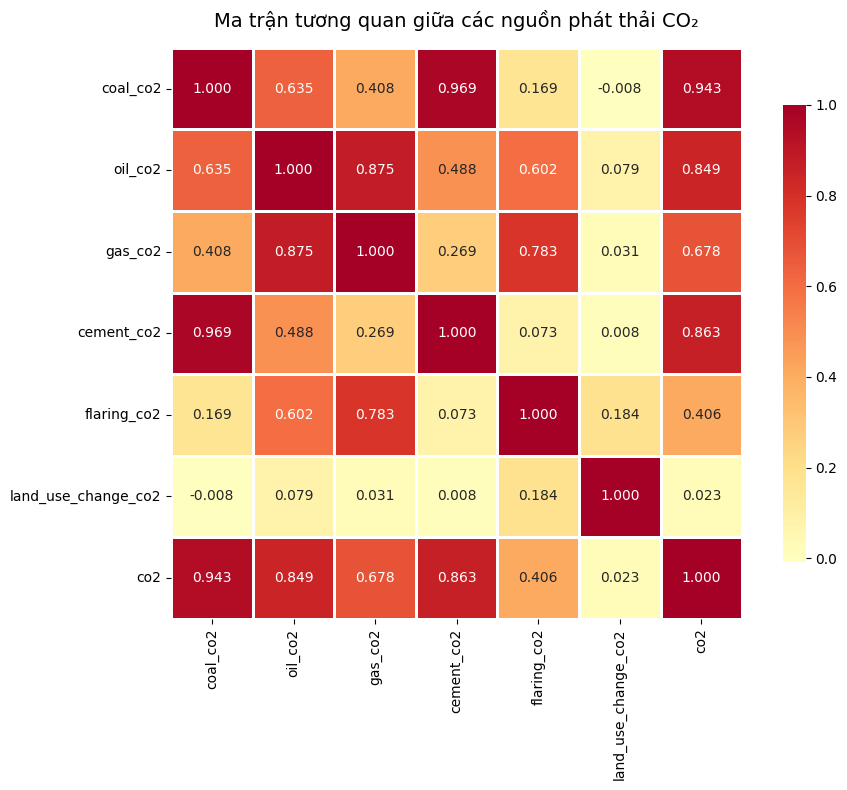

In [ ]:
# Chọn các cột nguồn phát thải
emission_sources = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2',
                    'flaring_co2', 'land_use_change_co2']
emission_sources = [col for col in emission_sources if col in df_country.columns]

df_emissions = df_country[emission_sources + ['co2']].dropna()

# Ma trận tương quan nguồn phát thải
emission_corr = df_emissions.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    emission_corr,
    annot=True,
    fmt='.3f',
    cmap='RdYlGn_r',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Ma trận tương quan giữa các nguồn phát thải CO₂', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

### PHÂN CỤM CÁC QUỐC GIA THEO MỨC PHÁT THẢI CO2 TRUNG BÌNH GIAI ĐOẠN 2000-2023

### Chuẩn bị dữ liệu

In [9]:
# Nạp thư viện
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Lọc riêng quốc gia
df_country = df[df["Description"] == "Country"].copy()


In [10]:
# Lấy tên quốc gia làm nhãn
countries = df_country["Name"]
data_cluster = df_country[numeric_cols].copy()

### Xử lý dữ liệu bị thiếu bằng Median

In [11]:
for col in data_cluster.columns:
    if data_cluster[col].isna().sum() > 0:
        data_cluster[col] = data_cluster[col].fillna(data_cluster[col].median())

### Tính trung bình 23 năm cho từng quốc gia


In [12]:
df_country_mean = (
    df_country
    .groupby("Name")[[
        'population', 'gdp', 'co2', 'co2_per_capita', 'co2_per_gdp',
        'co2_growth_abs', 'co2_growth_prct', 'cement_co2', 'coal_co2',
        'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2',
        'primary_energy_consumption', 'temperature_change_from_co2'
    ]]
    .mean()
    .reset_index()
)

### Chuẩn hóa dữ liệu StandardScaler

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(data_cluster)
preprocessed = pd.DataFrame(data=X, columns=numeric_cols)

### Giảm chiều dữ liệu bằng PCA

In [14]:
pca = PCA(n_components=None)
data_clusterx_pca = pca.fit(preprocessed)
data_clusterx_pca.explained_variance_ratio_
n_components = sum(data_clusterx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
CO2_PCA = pca.fit_transform(preprocessed)
print(n_components)

2


### Chọn tham số K bằng Elbow Method

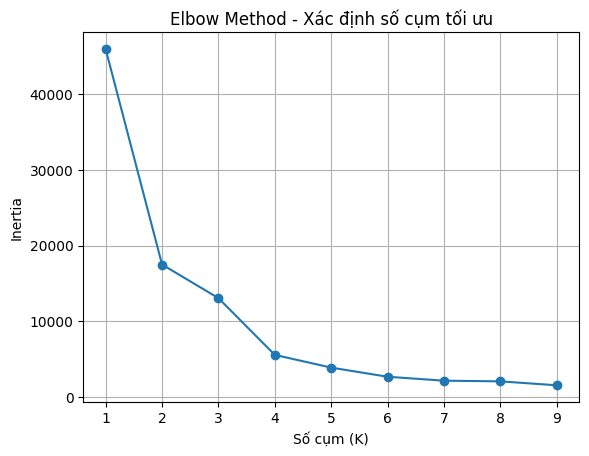

In [15]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(CO2_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method - Xác định số cụm tối ưu")
plt.xlabel("Số cụm (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(CO2_PCA)

KMeans(n_clusters=3, n_init=10, random_state=42)

### Đánh giá mô hình bằng SILHOUETTE_SCORE

In [17]:
from sklearn.metrics import r2_score, silhouette_score

km_inertias, km_scores = [], []
for k in range(3, 10):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X, km.labels_)}")
km_inertias

Processing K-Means with k = 3, Intertia = 34866.75598255408, Silhoutte Score = 0.9068651672076261
Processing K-Means with k = 4, Intertia = 31322.63507292449, Silhoutte Score = 0.8204938711249914
Processing K-Means with k = 5, Intertia = 27376.04356703728, Silhoutte Score = 0.5198953369309963
Processing K-Means with k = 6, Intertia = 20621.50391109624, Silhoutte Score = 0.5300870070973601
Processing K-Means with k = 7, Intertia = 18114.28636160757, Silhoutte Score = 0.5286023379159923
Processing K-Means with k = 8, Intertia = 16854.776906474508, Silhoutte Score = 0.4037961154686076
Processing K-Means with k = 9, Intertia = 15278.630640726038, Silhoutte Score = 0.5512882303801856


[34866.75598255408,
 31322.63507292449,
 27376.04356703728,
 20621.50391109624,
 18114.28636160757,
 16854.776906474508,
 15278.630640726038]

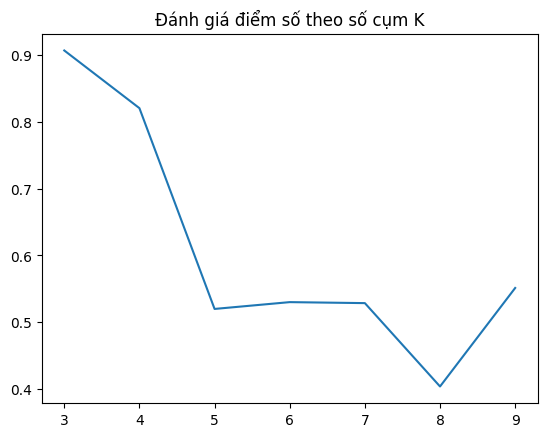

In [18]:
sns.lineplot (x=range(3,10), y=km_scores)
plt.title('Đánh giá điểm số theo số cụm K')
plt.show()

Xem các biến thành phần

In [19]:
# Hiển thị ma trận thành phần
pca_components = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Xem biến nào ảnh hưởng mạnh nhất tới PC1 và PC2
print("=== Thành phần PCA ===")
display(pca_components.T)  # Hiển thị toàn bộ

# Hoặc chỉ lấy top biến có ảnh hưởng lớn nhất
print("\nTop biến ảnh hưởng đến PC1:")
print(pca_components.loc["PC1"].abs().sort_values(ascending=False).head(5))

print("\nTop biến ảnh hưởng đến PC2:")
print(pca_components.loc["PC2"].abs().sort_values(ascending=False).head(5))


=== Thành phần PCA ===


,PC1,PC2
population,0.280249,-0.274358
gdp,0.344343,0.047939
co2,0.356708,-0.091329
co2_per_capita,0.001989,0.043898
co2_per_gdp,0.003930,0.029923
co2_growth_abs,0.171056,-0.427037
co2_growth_prct,-0.002331,-0.017625
cement_co2,0.285972,-0.379906
coal_co2,0.318024,-0.299388
flaring_co2,0.201006,0.447373



Top biến ảnh hưởng đến PC1:
primary_energy_consumption     0.359765
co2                            0.356708
gdp                            0.344343
oil_co2                        0.330350
temperature_change_from_co2    0.320022
Name: PC1, dtype: float64

Top biến ảnh hưởng đến PC2:
flaring_co2       0.447373
co2_growth_abs    0.427037
gas_co2           0.392281
cement_co2        0.379906
coal_co2          0.299388
Name: PC2, dtype: float64


Xem giá trị trung bình của mỗi cụm

In [20]:
# Đảm bảo cột CO2 là số
df_country["co2"] = pd.to_numeric(df_country["co2"], errors="coerce")

# Gán nhãn cluster cho dữ liệu gốc
df_country["cluster"] = kmeans.labels_

# Tính trung bình CO2 theo cụm
cluster_summary = (
    df_country.groupby("cluster")["co2"]
    .mean()
    .sort_values()
)
print(cluster_summary)


cluster
0      94.538423
1    5562.299542
2    8776.318136
Name: co2, dtype: float64


### Vẽ biểu đồ

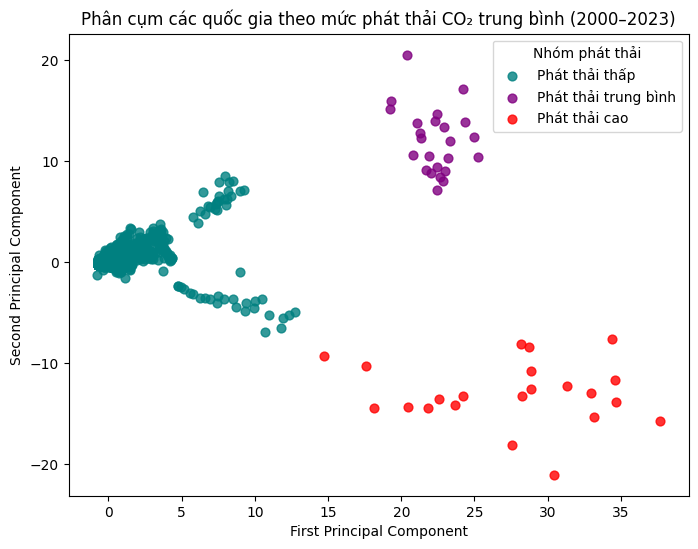

In [21]:
# Tạo mapping cụm → mức phát thải
cluster_labels = {
    0: "Phát thải thấp",
    1: "Phát thải trung bình",
    2: "Phát thải cao"
}

# Tạo mapping màu tương ứng
colors = {
    0: "teal",     # thấp
    1: "purple",       # trung bình
    2: "red"        # cao
}

# Vẽ scatter với màu theo mức phát thải
plt.figure(figsize=(8,6))
for cluster_id, label in cluster_labels.items():
    mask = kmeans.labels_ == cluster_id
    plt.scatter(
        CO2_PCA[mask, 0],
        CO2_PCA[mask, 1],
        c=colors[cluster_id],
        label=label,
        s=40,
        alpha=0.8
    )

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Phân cụm các quốc gia theo mức phát thải CO₂ trung bình (2000–2023)")
plt.legend(title="Nhóm phát thải")
plt.show()


### Gán nhãn cụm


In [ ]:
df_country['cluster_label'] = kmeans.labels_
display(df_country.head())

,Description,Name,year,population,gdp,co2,co2_per_capita,co2_per_gdp,co2_growth_abs,co2_growth_prct,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,primary_energy_consumption,temperature_change_from_co2,cluster,cluster_label
0,Country,Afghanistan,2000,20130334.0,1.128379e+10,1.047,0.052,0.093,-0.045,-4.078,0.010,0.004,0.022,0.224,0.057,0.788,5.914,0.000,0,0
1,Country,Albania,2000,3166147.0,1.473684e+10,3.025,0.053,0.097,0.039,1.297,0.094,0.070,0.000,0.022,-0.087,2.840,28.732,0.000,0,0
2,Country,Algeria,2000,30903895.0,2.085540e+11,85.399,0.063,0.071,-6.051,-6.616,3.789,1.960,14.287,38.534,5.087,26.828,299.946,0.001,0,0
3,Country,Andorra,2000,65703.0,NaN,0.524,0.069,0.074,0.011,2.143,0.000,0.000,0.000,NaN,0.029,0.524,NaN,0.000,0,0
4,Country,Angola,2000,16194872.0,2.351218e+10,15.995,0.053,0.055,-1.266,-7.335,0.081,NaN,11.162,1.085,23.296,3.668,32.448,0.002,0,0


### Tính trung bình lượng phát thải co2 theo cụm và năm


In [ ]:
df_cluster_trend = df_country.groupby(['cluster_label', 'year'])['co2'].mean().reset_index()

In [ ]:
display(df_cluster_trend.head())

,cluster_label,year,co2
0,0,2000,96.174072
1,0,2001,97.755567
2,0,2002,79.649207
3,0,2003,82.519617
4,0,2004,84.652777


### Trực quan hóa


In [ ]:
# Nạp thư viện
import plotly.express as px
import matplotlib.cm as cm

# Số cụm (giống như trong mô hình KMeans)
n_clusters = 3

# Lấy bảng màu viridis giống bên matplotlib
# viridis_cmap = cm.get_cmap('viridis', n_clusters)
# cluster_colors_hex = [
#     f"rgba({int(r*255)}, {int(g*255)}, {int(b*255)}, {a})"
#     for r, g, b, a in [viridis_cmap(i) for i in range(n_clusters)]
# ]

# Tạo mapping cụm → mức phát thải
cluster_labels = {
    0: "Phát thải thấp",
    1: "Phát thải trung bình",
    2: "Phát thải cao"
}

# Tạo mapping màu tương ứng
colors = {
    0: "teal",     # thấp
    1: "purple",       # trung bình
    2: "red"        # cao
}

# Map cluster label to color
color_map = {label: colors[cluster_id] for cluster_id, label in cluster_labels.items()}

# Add cluster labels to the trend dataframe
df_cluster_trend['cluster_label_text'] = df_cluster_trend['cluster_label'].map(cluster_labels)


# Vẽ lại biểu đồ Plotly với đúng thứ tự màu theo cụm
fig = px.line(
    df_cluster_trend.sort_values("cluster_label"),
    x='year',
    y='co2',
    color='cluster_label_text', # Use text label for color mapping
    title='Xu hướng phát thải CO₂ trung bình theo cụm quốc gia (2000–2023)',
    markers=True,
    color_discrete_map=color_map,  # Use the custom color map
    category_orders={"cluster_label_text": ["Phát thải thấp", "Phát thải trung bình", "Phát thải cao"]} # Ensure correct legend order
)

fig.update_layout(
    xaxis_title="Năm",
    yaxis_title="Lượng phát thải CO₂ trung bình (kt)",
    legend_title="Nhóm phát thải"
)

fig.update_traces(marker=dict(size=8))
fig.show()


### PHÂN NHÓM QUỐC GIA THEO MỨC PHÁT THẢI CO2 (CLASSIFICATION)

### Nạp thư viện

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### Chuẩn bị và xử lý dữ liệu


In [ ]:
# Chọn năm 2023
df_2023 = df[df['year'] == 2023].copy()

In [ ]:
# Tạo target 3 nhóm theo co2
# Low: <=33%, Medium: 33-66%, High: >66%
co2_quantiles = df_2023['co2'].quantile([0.33, 0.66])
def co2_group(x):
    if x <= co2_quantiles[0.33]:
        return 0  # Low
    elif x <= co2_quantiles[0.66]:
        return 1  # Medium
    else:
        return 2  # High

df_2023['co2_group'] = df_2023['co2'].apply(co2_group)

In [ ]:
# Chọn features
features = ['gdp','co2_per_gdp','population','co2_per_capita','cement_co2','coal_co2',
            'oil_co2','gas_co2','flaring_co2','land_use_change_co2',
            'primary_energy_consumption','temperature_change_from_co2']

In [ ]:
# Kiểm tra dữ liệu năm 2023
missing_df = pd.DataFrame({
    'Missing Values': df_2023.isna().sum(),
    'Missing (%)': (df_2023.isna().sum() / len(df_2023)) * 100
}).round(2)

print("TÌNH TRẠNG GIÁ TRỊ THIẾU (năm 2023):")
print(missing_df)


TÌNH TRẠNG GIÁ TRỊ THIẾU (năm 2023):
                             Missing Values  Missing (%)
Description                               0         0.00
Name                                      0         0.00
year                                      0         0.00
population                               23         9.09
gdp                                     253       100.00
co2                                       7         2.77
co2_per_capita                           72        28.46
co2_per_gdp                             253       100.00
co2_growth_abs                           18         7.11
co2_growth_prct                          20         7.91
cement_co2                               24         9.49
coal_co2                                 96        37.94
flaring_co2                              17         6.72
gas_co2                                 104        41.11
land_use_change_co2                      39        15.42
oil_co2                                  20        

In [ ]:
# Cập nhật lại danh sách features bỏ biến 'gdp' và 'co2_per_gdp'
features = [
    'population', 'co2_per_capita', 'cement_co2', 'coal_co2', 'oil_co2',
    'gas_co2', 'flaring_co2', 'land_use_change_co2',
    'primary_energy_consumption', 'temperature_change_from_co2'
]

In [ ]:
# Define X and y
X = df_2023[features].copy()   # Các biến đầu vào đã chọn
y = df_2023['co2_group']       # 3 nhóm theo co2

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Xây dựng mô hình và tối ưu tham số

Nhiệm vụ 1: Mô hình Logistic Regression với GridSearchCV

In [ ]:
# Pipeline: Imputer + Scaler + Logistic Regression
pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000))
])

param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__solver": ["lbfgs", "liblinear"]
}

grid_lr = GridSearchCV(pipe, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("=== Logistic Regression ===")
print("Best params:", grid_lr.best_params_)

# Đánh giá mô hình
y_pred_lr = grid_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
Best params: {'model__C': 10, 'model__solver': 'lbfgs'}
Accuracy: 0.6862745098039216

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.69      0.58        16
           1       0.64      0.56      0.60        16
           2       1.00      0.79      0.88        19

    accuracy                           0.69        51
   macro avg       0.71      0.68      0.69        51
weighted avg       0.73      0.69      0.70        51



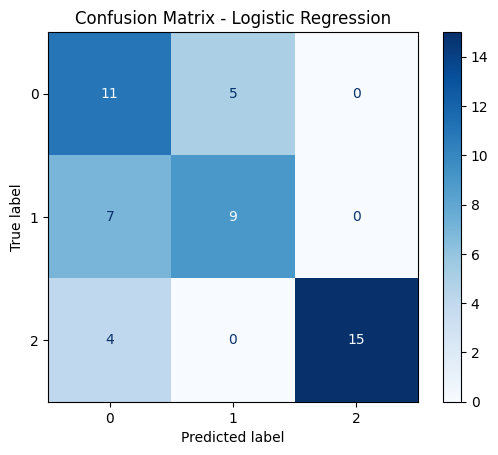

In [ ]:
# Confusion Matrix cho Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Nhiệm vụ 2: Tối ưu tham số cho mô hình cây quyết định bằng GridSearchCV và trực quan hóa hiệu quả mô hình

In [ ]:
pipe_dt = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler(with_mean=False)),
    ("model", DecisionTreeClassifier(random_state=42))
])

param_dt = {
    "model__max_depth": [3, 5, 7]
}

grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("=== Decision Tree ===")
print("Best params:", grid_dt.best_params_)
print("Train CV accuracy:", grid_dt.best_score_)
print("Test accuracy:", grid_dt.score(X_test, y_test))
print(classification_report(y_test, grid_dt.predict(X_test)))

=== Decision Tree ===
Best params: {'model__max_depth': 5}
Train CV accuracy: 0.8962195121951219
Test accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.80      0.75      0.77        16
           2       0.89      0.89      0.89        19

    accuracy                           0.82        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.82      0.82      0.82        51



Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, None]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, None]},
             return_train_score=True, scoring='accuracy')

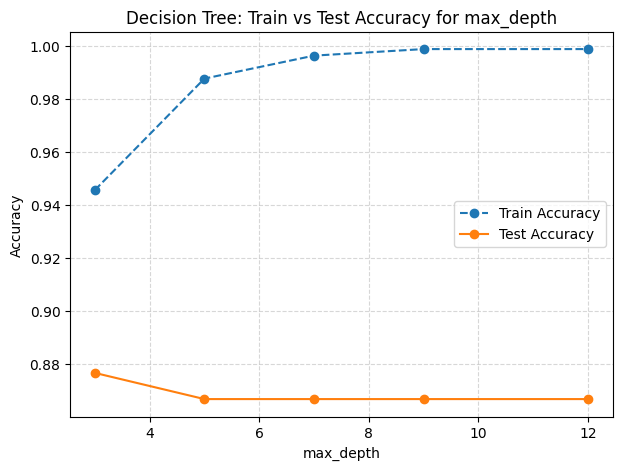

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

results_dt = pd.DataFrame(grid_dt.cv_results_)

# Chuyển None → số để hiển thị rõ trên trục
results_dt['param_max_depth_plot'] = results_dt['param_max_depth'].apply(lambda x: 12 if x is None else x)

plt.figure(figsize=(7,5))
plt.plot(results_dt['param_max_depth_plot'], results_dt['mean_train_score'], marker='o', linestyle='--', label='Train Accuracy')
plt.plot(results_dt['param_max_depth_plot'], results_dt['mean_test_score'], marker='o', linestyle='-', label='Test Accuracy')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Train vs Test Accuracy for max_depth")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

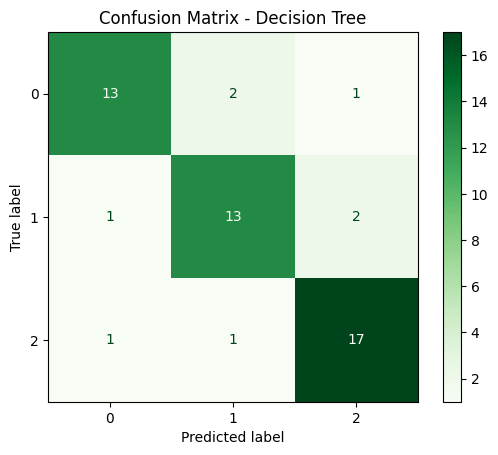

In [ ]:
# Confusion Matrix cho Decision Tree
y_pred_dt = grid_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Nhiệm vụ 3: Xây dựng rừng cây (random forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # xử lý missing values
    ('rf', RandomForestClassifier(random_state=42))
])

In [ ]:
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_rf = GridSearchCV(
    pipeline_rf, param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    return_train_score=True
)

grid_rf.fit(X_train, y_train)

print("=== Random Forest ===")
print("Best params:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)

y_pred_rf = grid_rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_rf)
print("\nTest Accuracy:", test_acc)
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))

=== Random Forest ===
Best params: {'rf__max_depth': 7, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Best CV Accuracy: 0.9209756097560977

Test Accuracy: 0.9019607843137255

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.88      0.88      0.88        16
           2       0.95      0.95      0.95        19

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51



Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

In [ ]:
# Plot: Fit Time vs n_estimators
cv_results_df = pd.DataFrame(grid_rf.cv_results_)

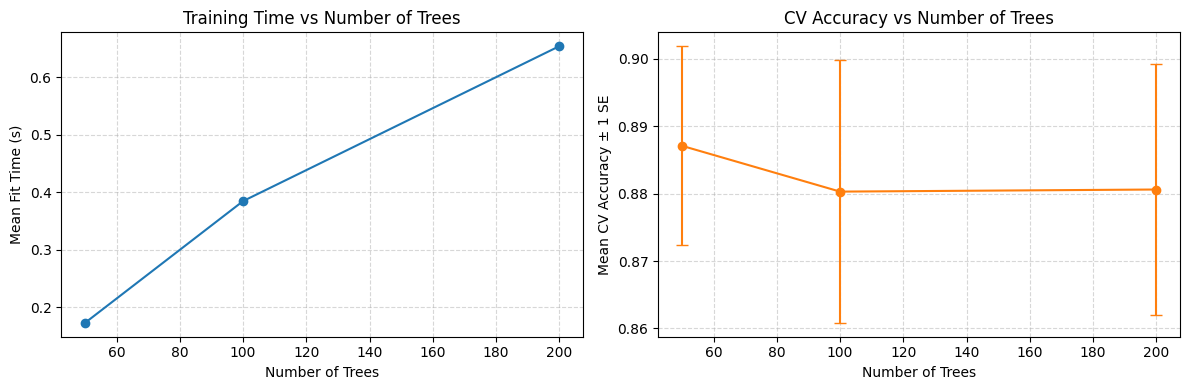

In [ ]:
summary = cv_results_df.groupby('param_rf__n_estimators').agg(
    mean_test_score=('mean_test_score', 'mean'),
    std_test_score=('std_test_score', 'mean'),
    mean_fit_time=('mean_fit_time', 'mean')
).reset_index()

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Màu riêng cho từng biểu đồ
color_fit_time = 'tab:blue'
color_accuracy = 'tab:orange'

# Biểu đồ Training Time
axs[0].plot(
    summary['param_rf__n_estimators'],
    summary['mean_fit_time'],
    '-o',
    color=color_fit_time,
    label='Mean Fit Time'
)
axs[0].set_xlabel('Number of Trees')
axs[0].set_ylabel('Mean Fit Time (s)')
axs[0].set_title('Training Time vs Number of Trees')
axs[0].grid(linestyle='--', alpha=0.5)

# Biểu đồ Accuracy
axs[1].errorbar(
    summary['param_rf__n_estimators'],
    summary['mean_test_score'],
    yerr=summary['std_test_score']/np.sqrt(5),
    fmt='-o',
    capsize=4,
    color=color_accuracy,
    label='Mean CV Accuracy'
)
axs[1].set_xlabel('Number of Trees')
axs[1].set_ylabel('Mean CV Accuracy ± 1 SE')
axs[1].set_title('CV Accuracy vs Number of Trees')
axs[1].grid(linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

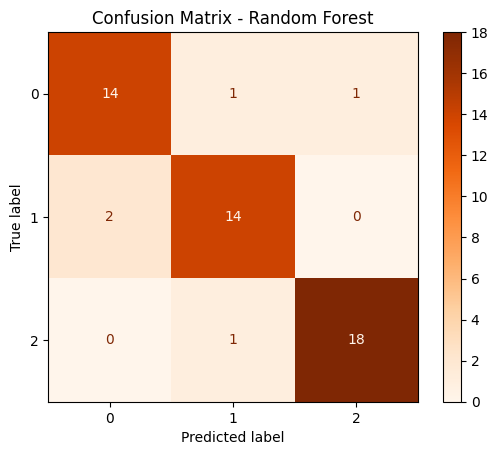

In [ ]:
# Confusion Matrix cho Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="Oranges")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### Xác định các đặc trưng quan trọng (feature importance)

In [ ]:
# Extract best model from pipeline
rf_best = grid_rf.best_estimator_.named_steps['rf']

# Feature Importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Feature  Importance
4                      oil_co2    0.306662
5                      gas_co2    0.186978
2                   cement_co2    0.158117
9  temperature_change_from_co2    0.101997
3                     coal_co2    0.076968
0                   population    0.066983
7          land_use_change_co2    0.042806
6                  flaring_co2    0.029661
8   primary_energy_consumption    0.021572
1               co2_per_capita    0.008256


In [ ]:
# Lấy số lượng feature
n_features = len(feature_importance)

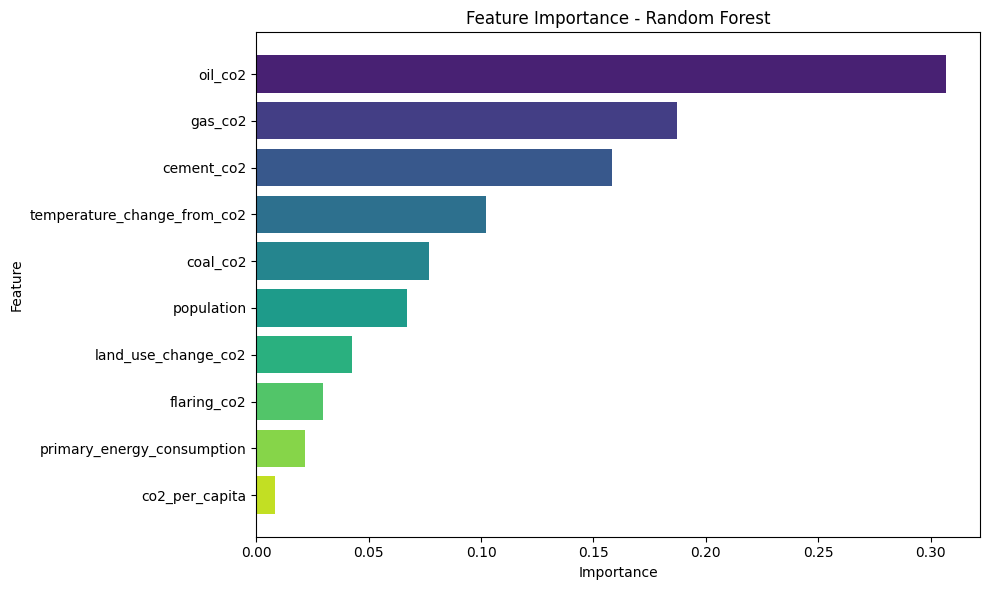

In [ ]:
# Tạo màu gradient với seaborn
colors = sns.color_palette("viridis", n_colors=n_features)

# Vẽ biểu đồ nhiều màu
plt.figure(figsize=(10,6))
plt.barh(
    feature_importance['Feature'],
    feature_importance['Importance'],
    color=colors
)
plt.gca().invert_yaxis()  # Biến quan trọng nhất lên trên
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()